In [6]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Adjust the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\User\Desktop\StudentPerformance.csv')

In [7]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1


In [8]:
# 1 Checking Completeness of a data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

StudentID - 0.0%
Age - 0.0%
Gender - 0.0%
Ethnicity - 0.0%
ParentalEducation - 0.0%
StudyTimeWeekly - 0.0%
Absences - 0.0%
Tutoring - 0.0%
ParentalSupport - 0.0%
Extracurricular - 0.0%
Sports - 0.0%
Music - 0.0%
Volunteering - 0.0%
GPA - 0.0%
GradeClass - 0.0%


In [10]:
# Yes! The data is complete
# 2 Let's check if there are any duplicat rows
duplicates = df.duplicated(subset=['Age', 'Gender', 'Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering'], keep = False)

# Display duplicate rows
duplicate_rows = df[duplicates]
if duplicate_rows.empty:
    print("No duplicates rows!")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicates rows!


In [11]:
# 3 Let's check the data types of clumns. I expect the Entity and Codes columns to be of type string 
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass             int64
dtype: object

In [12]:
# 4 Let's ensure that numerical columns are in a consistent format (e.g., not mixed with text or special characters).
# This is a part of Data Cleaning

# let's check for missing data again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

StudentID - 0.0%
Age - 0.0%
Gender - 0.0%
Ethnicity - 0.0%
ParentalEducation - 0.0%
StudyTimeWeekly - 0.0%
Absences - 0.0%
Tutoring - 0.0%
ParentalSupport - 0.0%
Extracurricular - 0.0%
Sports - 0.0%
Music - 0.0%
Volunteering - 0.0%
GPA - 0.0%
GradeClass - 0.0%


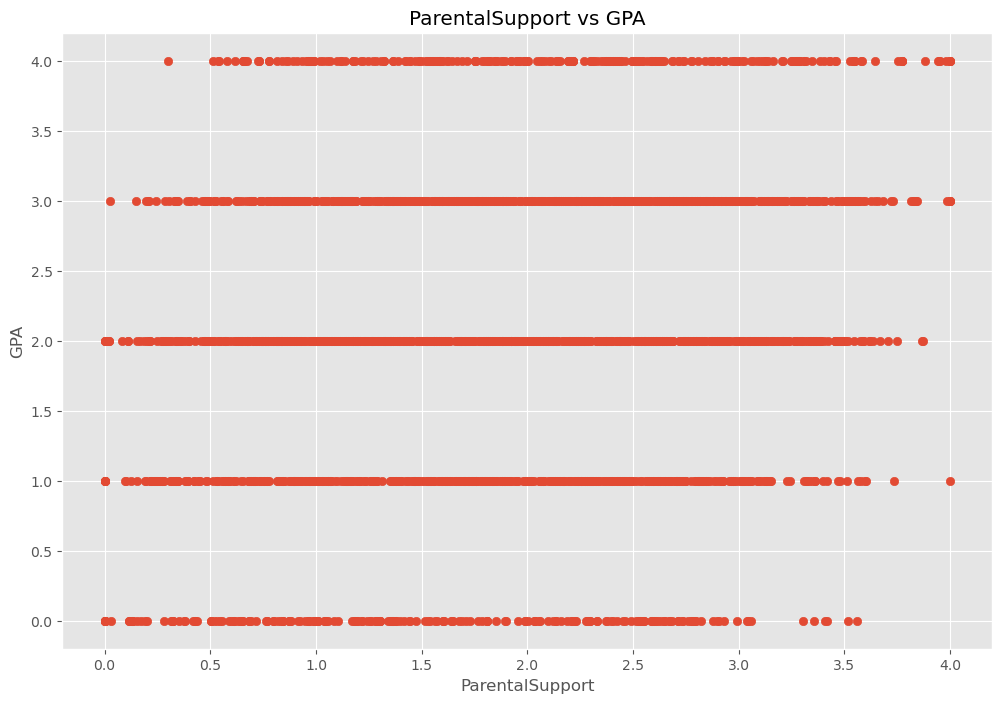

In [16]:
# Yes! There were no "unclean" data 
# 5 Let's build a scatterplot to visually identify trends
# While Exploring data in SQL, we have seen that the higher the Parental support is, the higehr is GPA. Let's check that out
plt.scatter(x = df['GPA'], y = df['ParentalSupport'])
plt.title('ParentalSupport vs GPA')
plt.xlabel('ParentalSupport')
plt.ylabel('GPA')
plt.show()

<Axes: xlabel='GPA', ylabel='Absences'>

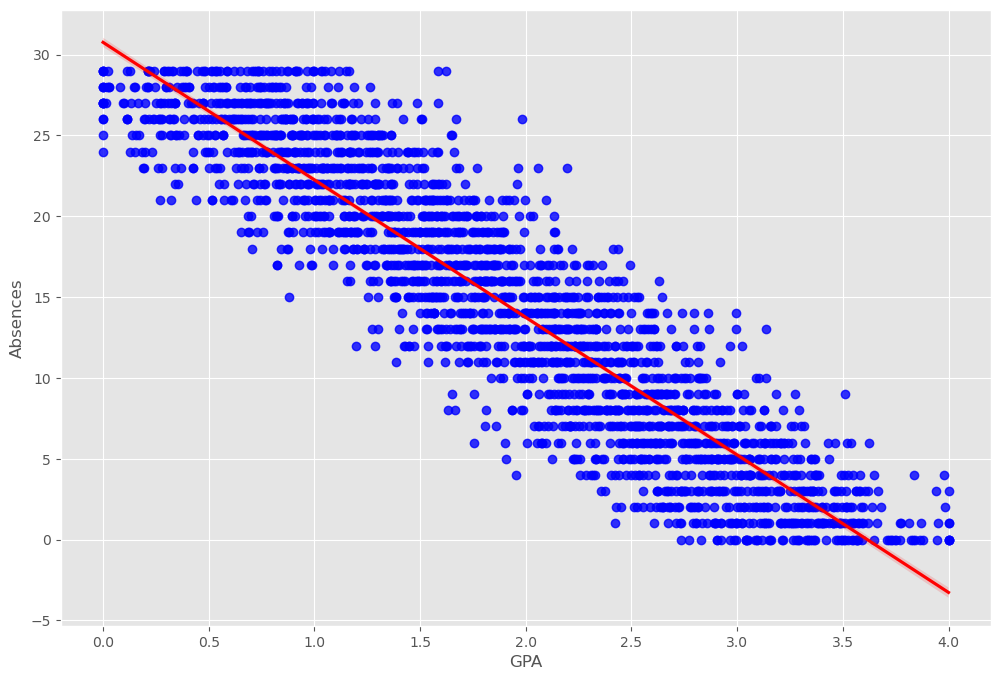

In [18]:
# 6 Let's confirm that high absences negatively affect GPA
sns.regplot(x = 'GPA', y = 'Absences', data = df, scatter_kws = {"color" : "blue"}, line_kws = {"color" : "red"})

In [23]:
# As you can see from the scatterplot above, high absences lead to low GPA
# 7 Let's start looking at correlation
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr(method='pearson')
correlation_matrix
#Types of correlation: pearson(default), kendall, spearman

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


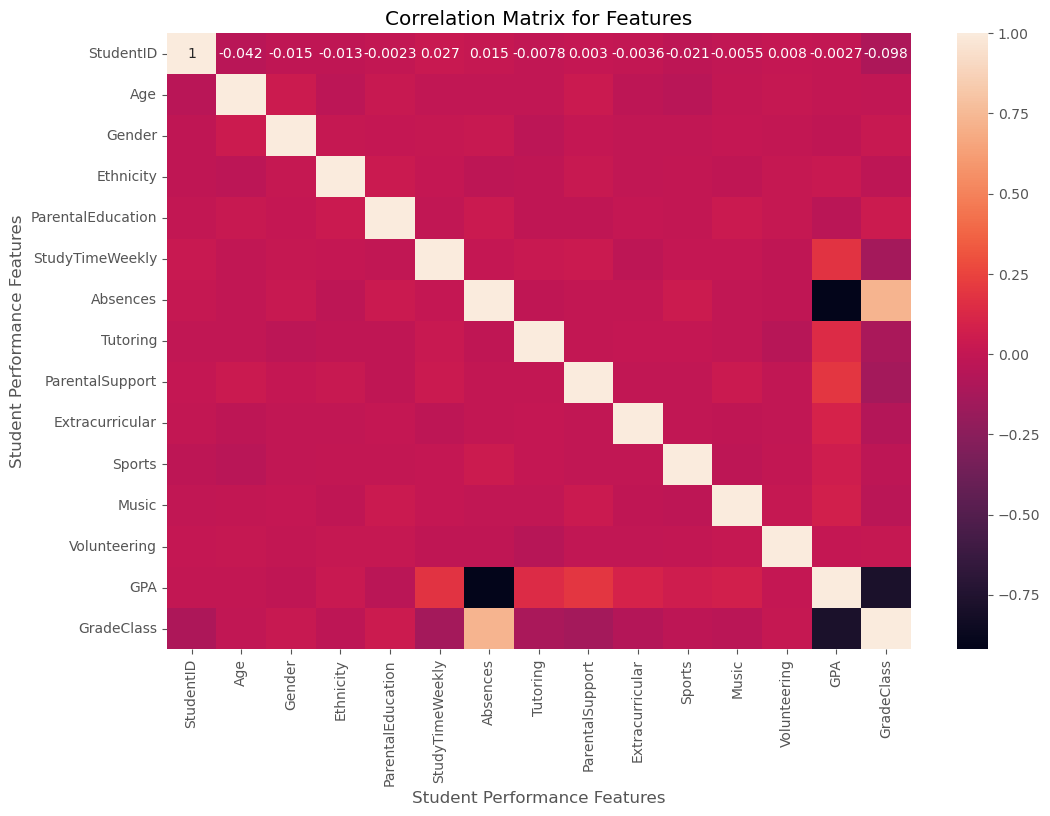

In [25]:
# Finally, let's check the correlation Matrix
# 8 Let's visualize the correlation using a heatmap
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Features')
plt.xlabel('Student Performance Features')
plt.ylabel('Student Performance Features')
plt.show()

In [26]:
# As you can see, we can notice that there is medium positive correlation between ParentalSupport and GPA
# and a negative correlation between Absences and GPA
# Our guesses have been proved and confirmed